In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [271]:
with open("methods_1000/fullrank_advi/model.pkl", "rb") as f:
    pkl = pickle.load(f)

with open("methods_1000/advi/model.pkl", "rb") as f:
    pkl2 = pickle.load(f)

with open("methods_1000/demetropolisz/model.pkl", "rb") as f:
    pkl3 = pickle.load(f)

In [272]:
pkl3

{'scale_params': {'mode': 'maxabs',
  'y_min': 0,
  'y_max': 12.0974568371517,
  'ds_min': Timestamp('2007-12-10 00:00:00'),
  'ds_max': Timestamp('2010-01-15 00:00:00')},
 'map_approx': None,
 'method': 'demetropolisz',
 'samples': 1000000,
 'other_components': {},
 'approx': None}

In [252]:
# hist =np.load("approx_hist.npy")
advi_hist = pkl2["approx"]
fradvi_hist = pkl["approx"]

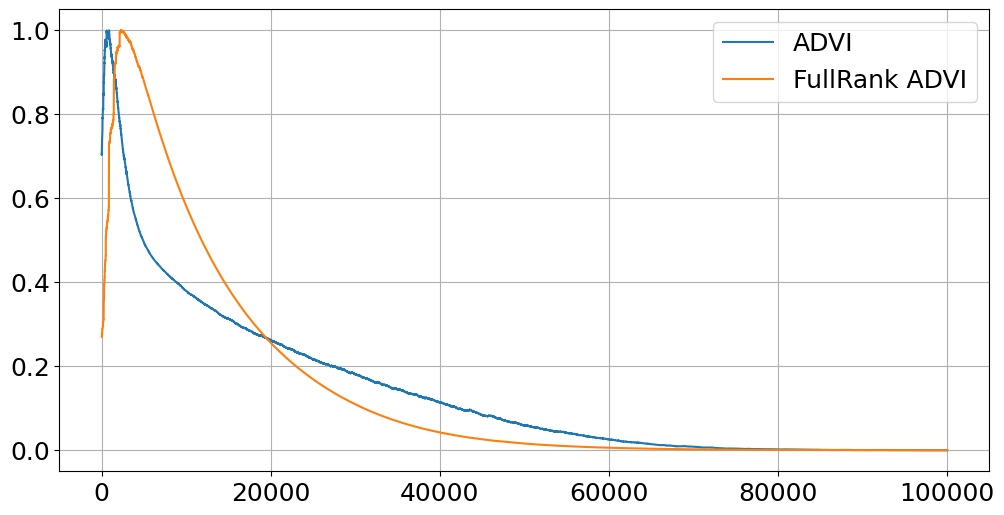

In [277]:
def exponential_smoothing(data, alpha):
    """
    Perform exponential smoothing on a time series.
    
    Parameters:
        data (array-like): The input time series.
        alpha (float): The smoothing factor (0 < alpha ≤ 1).
        
    Returns:
        np.ndarray: Smoothed time series.
    """
    smoothed = np.zeros_like(data)
    smoothed[0] = data[0]  # Initialize with the first value

    for t in range(1, len(data)):
        smoothed[t] = alpha * data[t] + (1 - alpha) * smoothed[t - 1]
    
    return smoothed

plt.figure(figsize=(12, 6))
# plt.suptitle("ELBO history", fontsize=18)
plt.grid()

ets_advi = exponential_smoothing(advi_hist, 0.001)
ets_fradvi = exponential_smoothing(fradvi_hist, 0.0001)

minmaxscale = lambda x: (x - x.min()) / (x.max() - x.min())

plt.plot(minmaxscale(ets_advi), label="ADVI")
plt.plot(minmaxscale(ets_fradvi), label="FullRank ADVI")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

1.1833393219682249

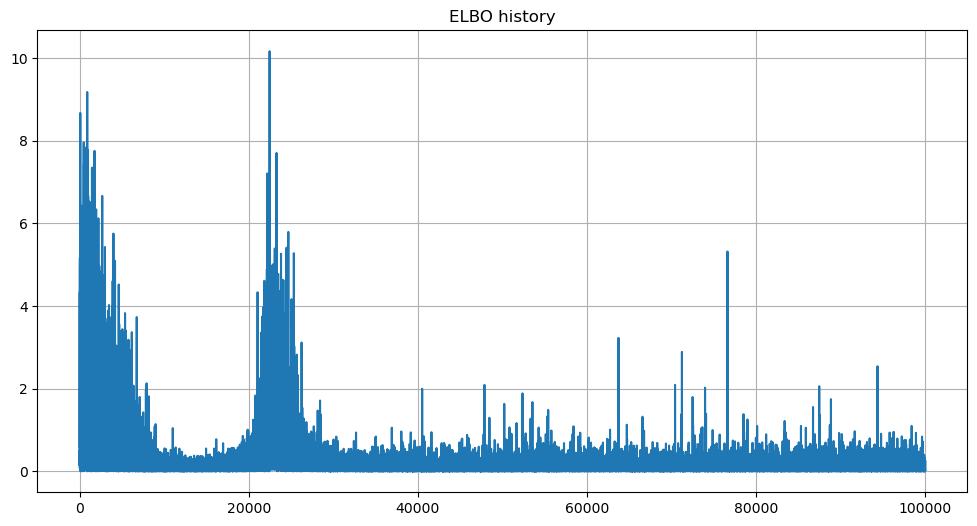

In [218]:
plt.figure(figsize=(12, 6))
plt.title("ELBO history")
plt.grid()

plt.plot(np.log1p((np.abs(np.diff(hist)) + eps) / (np.abs(hist[:-1]) + eps)))
np.abs(np.diff(hist) / hist[:-1]).mean()


In [239]:
means = []
eps=1e-6
threshold = 1e-5
for x in range(1000, 50001):
    means.append(hist[x - 1000: x].mean())
    if len(means) > 3:
        diff = (np.abs(np.diff(means[-3:])) + eps) / (np.abs(means[-3:-1]) + eps)
        if np.all(diff < threshold):
            print(x)
            break

1068


In [237]:
(np.abs(np.diff(means[:])) + eps) / (np.abs(means[:-1]) + eps)

array([3.16977655e-04, 2.00991343e-03, 4.21996098e-05, 2.41564251e-03,
       2.36907215e-04, 2.45893894e-04])

In [ ]:
threshold = 1e-2
window = 2
eps=1e-6
diff = (np.abs(np.diff(hist)) + eps) / (np.abs(hist[:-1]) + eps)
for x in range(window, len(diff)):
    if np.all(diff[x - window:x] < threshold):
        print(1 + x)
        break

63392


In [91]:
(np.abs(np.diff(hist)) + eps) / (np.abs(hist[:-1]) + eps)

array([  0.15495972,   1.14852474, 128.34643754, ...,   0.18020319,
         0.27811482,   0.13468616])

In [46]:
diff[- window:].max()

0.4771414071545458

In [202]:
means = []
stds = []
for x in range(1000, 100001):
    mean = hist[x - 1000:x].mean()
    std = hist[x - 1000:x].std()
    means.append(mean)
    stds.append(std)

means = np.array(means)
means_diff = np.abs(np.diff(means) / means[:-1])
threshold = 1e-2
window = 100
for x in range(window, len(means_diff)):
    if np.all(means_diff[x - window:x] < threshold):
        print(1001 + x)
        break

3099


In [171]:
np.array(stds)

array([1.72178358e+06, 1.72178238e+06, 1.72178233e+06, ...,
       1.01266050e+02, 1.01261480e+02, 1.01106814e+02])

In [6]:
changes = []
for x in range(1000, 50001):
    window = hist[x - 2:x]
    change = np.abs(np.diff(window) / window[:-1])
    changes.append(change.mean())
    # if change.mean() < 0.1:
    #     print(x)

In [7]:
changes

[0.37280421271467573,
 0.7375682191172817,
 0.6510224893478027,
 1.5898578530244862,
 0.8829827705374866,
 0.011450707265015037,
 2.5099319695062468,
 0.49801603097601355,
 134.58525576928807,
 0.9913243899373666,
 0.41252297993699527,
 5.896795803795153,
 0.8707929807696221,
 0.5417050464586188,
 0.3873994103262816,
 11.115618319844804,
 0.16744113892374687,
 0.9247498390934459,
 5.356512270001714,
 0.2608534692884667,
 0.43657580564983534,
 1.3584111055312718,
 0.10667713372626698,
 3.044726451017121,
 0.9823536545082979,
 61.884398790257855,
 0.7601950373071011,
 0.8033288528827888,
 0.5120980444306557,
 8.479778283349038,
 0.9281689273403837,
 0.06526115263865712,
 0.07871621306324322,
 7.547914002132341,
 0.8940048749625265,
 0.689487514338176,
 1.5346921845622754,
 0.7722078507582746,
 0.11584860450981717,
 17.22066643564456,
 0.35669401889870667,
 0.8082219724423295,
 0.14572282138869408,
 3.6481356833912586,
 0.4901849366836865,
 3.375155390779515,
 0.9433413667411705,
 0.13729